# RFC with original data and generated features

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../datasets/combined_reduced.csv')

In [3]:
X1 = np.load('./new_X.npy')

In [4]:
df.head()

,gunning_fog_index,lix,smog_index,wiener_sachtextformel,n_polysyllable_words,sent_neg,sent_neu,sent_pos,sent_compound,isolation_total,...,liwc_friends,liwc_health,liwc_ingestion,liwc_leisure,liwc_negative_emotion,liwc_positive_emotion,liwc_sadness,liwc_sexual,liwc_swear_words,liwc_work
0,9.145306,31.706803,9.387100,2.832296,12,0.171,0.768,0.061,-0.9418,0,...,0,3,0,0,5,2,3,0,0,0
1,8.314655,27.683190,9.017664,2.933491,17,0.000,0.935,0.065,0.8155,0,...,0,3,0,1,0,3,0,0,0,1
2,10.733333,34.240741,10.793553,4.375385,18,0.156,0.796,0.048,-0.8802,0,...,0,4,0,0,2,5,0,0,0,0
3,8.137030,27.109492,8.841846,2.895752,16,0.000,0.931,0.069,0.8062,0,...,0,3,0,1,0,3,0,0,0,0
4,9.302564,37.358974,9.725611,3.969113,8,0.177,0.670,0.153,-0.7992,0,...,0,1,0,0,3,1,0,0,0,2


In [5]:
# Convert the DataFrame to a NumPy array
df_array = df.to_numpy()

# Stack the DataFrame and the NumPy array horizontally
X_final = np.hstack((df_array, X1))

# The merged_array now contains both the columns from the DataFrame and the NumPy array for each row
print(X_final.shape) 

(374499, 1141)


In [6]:
target = pd.read_csv('../kag_red.csv')

In [7]:
from sklearn.model_selection import train_test_split

y = target['subreddit']  # Target

In [8]:
# merge X_final and y to single dataframe
df_final = pd.DataFrame(X_final)
df_final['subreddit'] = y

In [9]:
import pandas as pd
import numpy as np


# Get indexes of rows where subreddit is 'depression'
depression_rows = df_final[df_final['subreddit'] == 'depression'].index

# Calculate the number of rows to keep and remove for 'depression' subreddit
total_depression_rows = len(depression_rows)
rows_to_keep = int(total_depression_rows * 0.45)  # 45% of the rows to keep

# Randomly select 45% of the rows to keep
rows_to_keep_indexes = np.random.choice(depression_rows, size=rows_to_keep, replace=False)

# Get the indexes of rows to remove
rows_to_remove_indexes = depression_rows.difference(rows_to_keep_indexes)

# Remove 55% of rows with subreddit 'depression'
df_final.drop(rows_to_remove_indexes, inplace=True)

# Now df contains 45% of the original 'depression' rows randomly selected and all other rows intact

In [10]:
# Get indexes of rows where subreddit is 'suicidewatch'
s_rows = df_final[df_final['subreddit'] == 'suicidewatch'].index

# Calculate the number of rows to keep and remove for 'suicidewatch' subreddit
total_s_rows = len(s_rows)
rows_to_keep = int(total_s_rows * 0.85)  # 85% of the rows to keep

# Randomly select 85% of the rows to keep
rows_to_keep_indexes = np.random.choice(s_rows, size=rows_to_keep, replace=False)

# Get the indexes of rows to remove
rows_to_remove_indexes = s_rows.difference(rows_to_keep_indexes)

# Remove 15% of rows with subreddit 'suicidewatch'
df_final.drop(rows_to_remove_indexes, inplace=True)

In [11]:

X_final_d = df_final.drop('subreddit', axis=1)
y_final_d = df_final['subreddit']


In [12]:
# convert X_final_d and y_final_d to numpy arrays
X_final_d = X_final_d.to_numpy()

In [13]:
# print the shape of X_final and y
print(X_final_d.shape)
print(y_final_d.shape)

(300041, 1141)
(300041,)


# Performing PCA 

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=70)
pca.fit(X_final_d)
X_final_d = pca.transform(X_final_d)


In [15]:
# Print count of each class
print(y_final_d.value_counts())

subreddit
anxiety          57671
suicidewatch     56236
depression       52798
adhd             45631
bpd              24294
lonely           23635
autism            8869
schizophrenia     8712
ptsd              8643
addiction         7641
alcoholism        5911
Name: count, dtype: int64


In [16]:


X_train, X_test, y_train, y_test = train_test_split(X_final_d  , y_final_d, test_size=0.2, random_state=42)

In [17]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Encode the categorical target variable (y_train) using OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Step 2: Flatten the encoded labels
y_train_encoded = y_train_encoded.argmax(axis=1)
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1)).argmax(axis=1)

## Fitting the data and predicting with the model

In [19]:
print(y_train_encoded.shape)
print(X_train.shape)

(240032,)
(240032, 70)


In [20]:
from inferencing.scratch_RFC import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the classifier to the training data
rf_classifier.fit(X_train, y_train_encoded)

# Making predictions on the test data
predictions = rf_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test_encoded, predictions)
print("Accuracy:", accuracy)

Fitting RFC: 100%|██████████| 100/100 [24:25<00:00, 14.65s/it]


Accuracy: 0.6211401623089869


## Results of the model

In [21]:
# Generating a classification report
print("Classification Report:\n", classification_report(y_test_encoded, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.48      0.60      1501
           1       0.69      0.81      0.75      9186
           2       0.83      0.59      0.69      1189
           3       0.63      0.76      0.69     11551
           4       0.78      0.49      0.60      1783
           5       0.70      0.48      0.57      4876
           6       0.43      0.44      0.44     10522
           7       0.66      0.56      0.61      4796
           8       0.81      0.30      0.44      1713
           9       0.82      0.34      0.48      1648
          10       0.61      0.71      0.66     11244

    accuracy                           0.62     60009
   macro avg       0.71      0.54      0.59     60009
weighted avg       0.63      0.62      0.61     60009



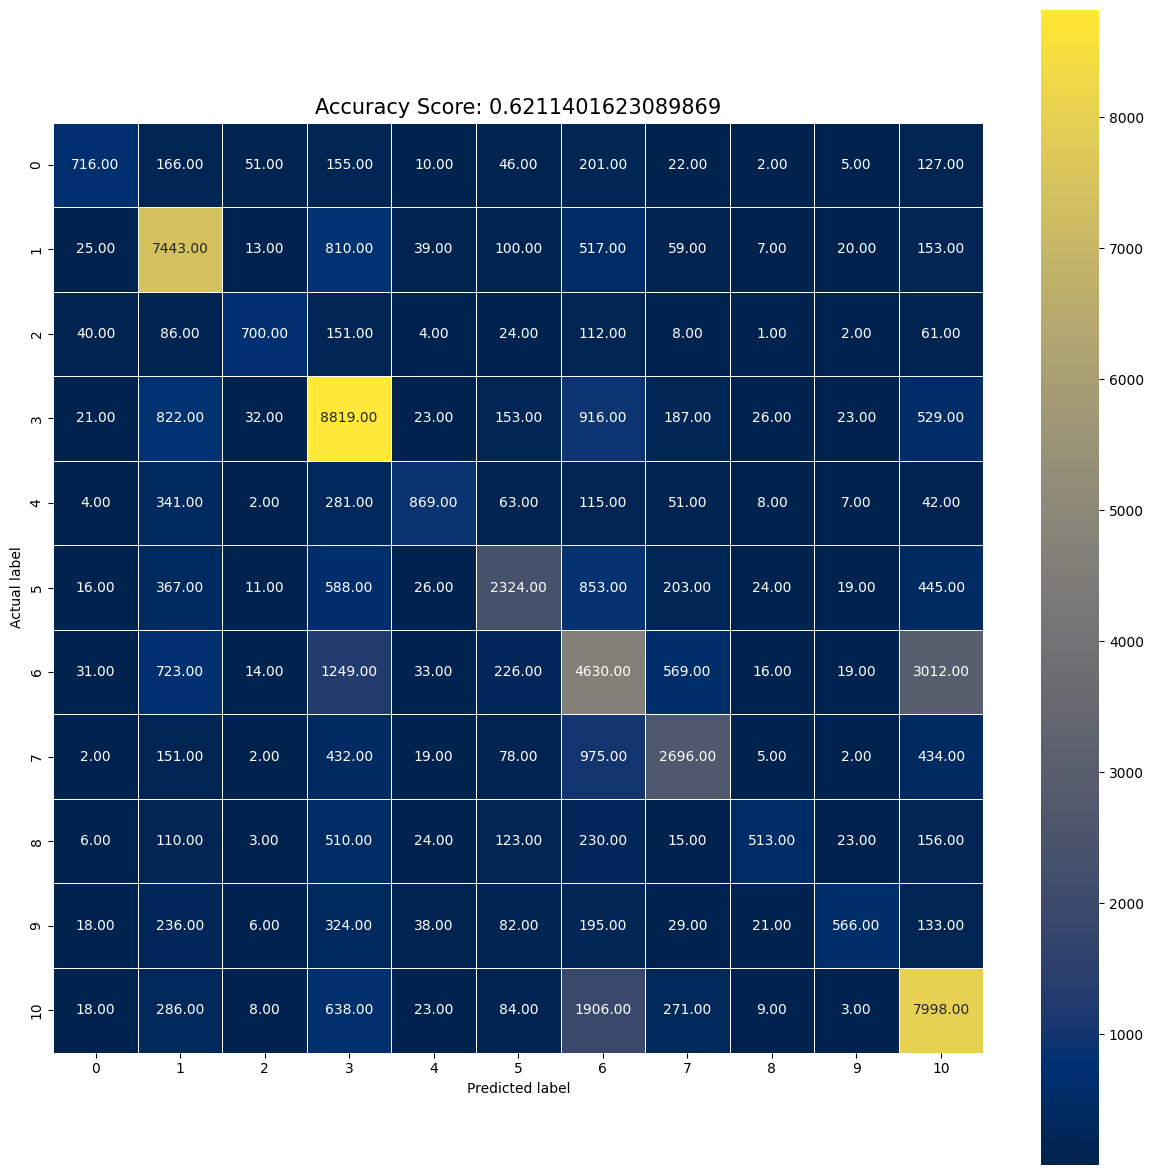

In [22]:
# display confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_encoded, predictions)


plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt="0.2f", linewidths=.5, square=True, cmap='cividis')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(accuracy), size=15)
plt.show();

In [23]:
import pickle

# Saving the model to a file
with open('../inferencing/models/rfc_model_combined.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)

In [ ]:
del rf_classifier